In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

In [2]:

df=pd.read_csv(r"C:\Users\Onur\Desktop\Turkcell_Machinelearning\Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])

y=df["Salary"]
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')

x=pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25,random_state=42)

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [5]:
df.shape

(263, 20)

In [6]:
lasso_model=Lasso().fit(x_train,y_train)

C:\Users\Onur\anaconda3\envs\test_conda_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [7]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
lasso_model.intercept_

-5.587450677336733

In [9]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [10]:
#farklı lambda değerleinde karşılık katsayılar

In [28]:
lasso=Lasso()
coefs=[]
alphas=np.random.randint(0,100000,10)
alphas2=10**np.linspace(10,-2,100)*0.5

for a in alphas2:
    lasso.set_params(alpha=a)
    lasso.fit(x_train,y_train)
    coefs.append(lasso.coef_)

C:\Users\Onur\anaconda3\envs\test_conda_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\Onur\anaconda3\envs\test_conda_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\Onur\anaconda3\envs\test_conda_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\Onur\anaconda3\envs\test_conda_env\lib\site

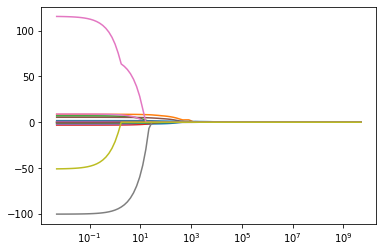

In [30]:
ax = plt.gca()
ax.plot(alphas2,coefs)
ax.set_xscale("log")   #x eksenini ayarlıyoruz

In [31]:
#TAHMİN

In [32]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
lasso_model.predict(x_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [34]:
lasso_model.predict(x_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [36]:
y_pred=lasso_model.predict(x_test)

In [38]:
np.sqrt(mean_squared_error(y_test,y_pred)) #ilkel test hatamız. optimize edilmemiş modelimizin test hatası

356.0975884554033

In [39]:
r2_score(y_test,y_pred)  #bağımsız değişkenlerin bağımlı değişkenin yüzde kaçını açıklıyor

0.4142279813236619

In [40]:
#model tuning

In [49]:
alphas2=10**np.linspace(10,-2,100)*0.5

In [50]:
lasso_cv_model=LassoCV(alphas=alphas2 ,cv=10,max_iter=100000).fit(x_train,y_train)

In [51]:
lasso_cv_model.alpha_  #bize bir değer öneriyor

201.85086292982749

In [52]:
lasso_tunned=Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(x_train,y_train)

In [53]:
lasso_tunned=Lasso(alpha=lasso_cv_model.alpha_).fit(x_train,y_train)  #yukarıdakiyle aynı anlama geliyor

In [54]:
y_pred=lasso_tunned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred)) #ilkel test hatamız. optimize edilmemiş modelimizin test hatası

363.6832708037446

In [56]:
pd.Series(lasso_tunned.coef_,index=x_train.columns)  #kat sayıların sıfırlanma durumunu gözlemlicez

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64